<a href="https://colab.research.google.com/github/Balaaabduljalil/NLP-news-classification/blob/master/Copy_of_DSN_Internship_Test_on_ML_and_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Welcome to the DSN Internship Coding Challenge! This assessment will put your Python programming and problem-solving abilities to the test. The assessment is divided into two sections:

- Section one of the assessment will require you to build a recall evaluation metric without using any external libraries.

- Section two of the assessment will put your knowledge of "list" in Python to the test.

Good luck! If you have questions about the framing of the questions, please contact **recruitment@datasciencenigeria.ai**

### How to Use and Submit this Notebook.
- Make a copy of this document and rename it **Firstname_Lastname_DSNInternshipCodingAssessment.ipynb**
- Before attempting to submit, ensure that you have ran all of the cells in your notebook and the output visible.
- Once you’ve completed all tasks, save and download a copy of the notebook as .ipynb
- Submit a link (make sure that the link is set to "Anyone on the internet with the link can view"), the downloaded copy of your final notebook, and the powerpoint your research summary via this [link](https://forms.gle/t8sFNrfAymZUrfJq7).

### What Not to Do.
- Do not share this document with any external party
- No teamwork is permitted
- No external libraries like (NumPy, Pandas, Keras, etc.) is allowed. Use only pure python
- After submitting a copy of your script, you are not permitted to make any changes to the online version; any discrepancy between the online and submitted copies will render your application null and void.

### Dataset

This is a news [dataset](https://drive.google.com/file/d/1NgPM7_mFCDKnuqI9SamMCrkF1mE5AgAI/view?usp=sharing) which contains 2225 examples of news articles with their respective labels. Use to the link to learn more about the dataset

## Section 1

### Task

**This is to test your knowledge on NLP**

Build and train a machine learning model with the provided dataset to classify the news category or topic. You can use any architecture or model, in this test.

**Make sure to plot the accuracy vs epochs and loss vs epochs graphs**

Epoch 1/10
56/56 [==============================] - 21s 307ms/step - loss: 1.5851 - accuracy: 0.2680 - val_loss: 1.5352 - val_accuracy: 0.5281
Epoch 2/10
56/56 [==============================] - 11s 195ms/step - loss: 1.2966 - accuracy: 0.5601 - val_loss: 0.9678 - val_accuracy: 0.7191
Epoch 3/10
56/56 [==============================] - 11s 199ms/step - loss: 0.6308 - accuracy: 0.8225 - val_loss: 0.4157 - val_accuracy: 0.8719
Epoch 4/10
56/56 [==============================] - 10s 171ms/step - loss: 0.2755 - accuracy: 0.9208 - val_loss: 0.2785 - val_accuracy: 0.9101
Epoch 5/10
56/56 [==============================] - 11s 196ms/step - loss: 0.1344 - accuracy: 0.9708 - val_loss: 0.2411 - val_accuracy: 0.9348
Epoch 6/10
56/56 [==============================] - 11s 195ms/step - loss: 0.0660 - accuracy: 0.9888 - val_loss: 0.2212 - val_accuracy: 0.9348
Epoch 7/10
56/56 [==============================] - 11s 195ms/step - loss: 0.0484 - accuracy: 0.9904 - val_loss: 0.2193 - val_accuracy: 0.9371

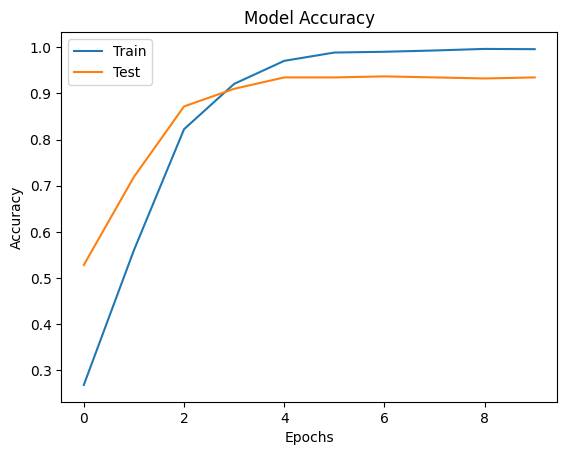

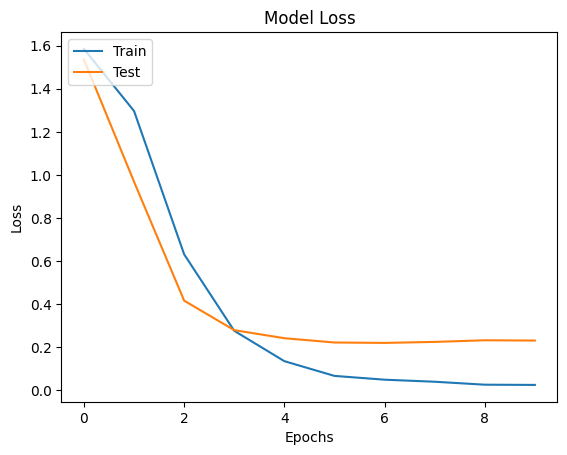

14/14 [==============================] - 1s 77ms/step - loss: 0.2302 - accuracy: 0.9348
Loss: 0.23024217784404755
Accuracy: 0.934831440448761


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import matplotlib.pyplot as plt

# Download and load the dataset
url = "https://drive.google.com/uc?id=1NgPM7_mFCDKnuqI9SamMCrkF1mE5AgAI"
df = pd.read_csv(url)

# Preprocessing
X = df['text']  # Input feature (news text)
y = df['category']  # Target variable (category)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to numerical values
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Tokenize the text data
max_words = 5000  # Maximum number of words to consider
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of numerical values
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have the same length
max_sequence_length = 500  # Maximum sequence length
X_train_seq = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_seq = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Build the CNN model
embedding_dim = 100  # Embedding dimension
filters = 128  # Number of filters
kernel_size = 5  # Size of filters
hidden_dims = 64  # Number of units in the hidden layer

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_sequence_length))
model.add(Conv1D(filters, kernel_size, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
epochs = 10  # Number of training epochs
batch_size = 32  # Batch size
history = model.fit(X_train_seq, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_seq, y_test))

# Plot accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test_seq, y_test, batch_size=batch_size)
print("Loss:", loss)
print("Accuracy:", accuracy)


# Testing a single news item

In [ ]:
# Preprocess a single news item
news_text = "The climate change-denying TikTok post that won't go away."
news_sequence = tokenizer.texts_to_sequences([news_text])
news_sequence = pad_sequences(news_sequence, maxlen=max_sequence_length)

# Get the model's prediction for the single news item
prediction = model.predict(news_sequence)

# Decode the predicted label
predicted_label = label_encoder.inverse_transform(np.argmax(prediction, axis=1))[0]

print("Predicted label:", predicted_label)


1/1 [==============================] - 0s 24ms/step
Predicted label: sport


# **Another simpler approach using sklearn (Naive Bayes)**

Just that it may not be possible to plot the accuracy vs epochs and loss vs epochs graphs for this model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Preprocessing
X = df['text']  # Input feature (news text)
y = df['category']  # Target variable (category)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Choose the number of features as needed
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)



# Train the model
model2 = MultinomialNB()
model2.fit(X_train, y_train)

# Predict the categories for the test set
y_pred = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9617977528089887


# Testing for a single example

In [ ]:
# Preprocess a single news item
news_text = "Colosseum: Man who carved names on ancient Rome amphitheatre is UK tourist, Italian police say"

news_vector = vectorizer.transform([news_text])

# Get the model's prediction for the single news item
predicted_category = model2.predict(news_vector)[0]

print("Predicted category:", predicted_category)


Predicted category: entertainment
